In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
%matplotlib inline
data=pd.read_csv('../data/heart2.csv')

**Nous avons les données suivantes dans notre base de données**

Age: Âge lors de la crise cardiaque

Sex: Sexe de la personne

ChestPainType: Type de douleur à la poitrine

RestingBP: Pression artérielle au repos (mm Hg)

Cholesterol: Cholesterol du patient (mm/dl)

FastingBS : Glycémie à jeun du patient (1 si FastingBS > 120 mg/dl, 0 sinon)

RestingECG: Résultat des électrocardiogrammes au repos (Normal: Normale, ST: Ondes ST-T abnormales (Invesions onde T  et/ou  augmentaion ou réduction de > 0.05 mV des ondes ST), LVH: Hypertrophie probable ou définitive du ventricule gauche selon le critères d'Estes)

MaxHR: Fréquence cardiaque maximale (entre 60 et 202 bpm)

ExerciseAngina: Angine causée par l'exercice (Y: Oui, N: Non)

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: Si le patient avait une maladie cardiaque (1: Oui, 0: Non)




In [13]:
data=data.rename(columns = {
    'age':'Age', 
    'trestbps':'RestingBP', 
    'chol':'Cholesterol', 
    'thalach':'MaxHR', 
    'oldpeak':'Oldpeak', 
    'fbs':'FastingBS',
    'sex':'Sex',
    'cp':'ChestPainType',
    'restecg':'RestingECG',
    'exang':'ExerciseAngina',
    'slope':'ST_Slope',
    'target':'HeartDisease'})

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ca,thal,HeartDisease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [32]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [34]:
data.shape

(918, 12)

Nous n'avons pas de données manquantes, ce qui est une bonne nouvelle.


In [35]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [36]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [37]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [38]:
#Nous divisons nos données en 2 ensembles: train et test. Nous allons entrainer notre modèle sur train afin de vérifier sur test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.2,random_state= 4)

**Visualisons nos différentes données numériques**

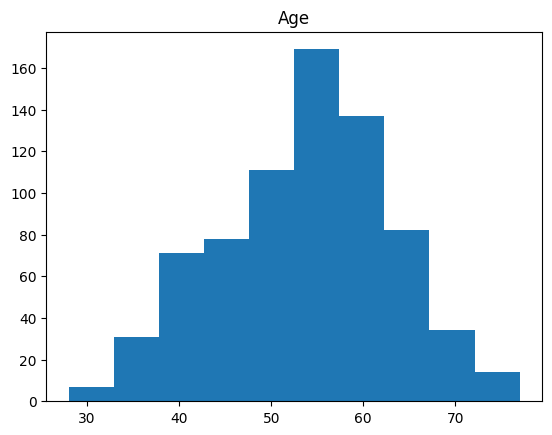

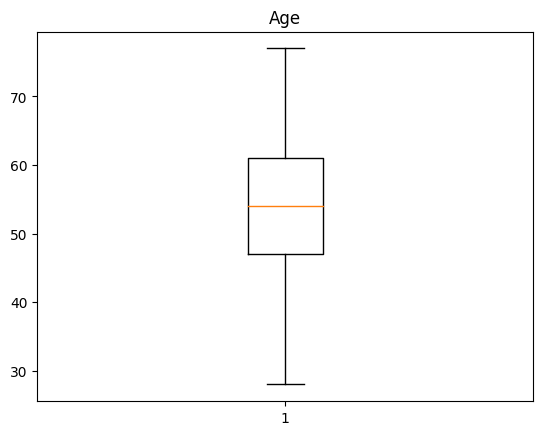

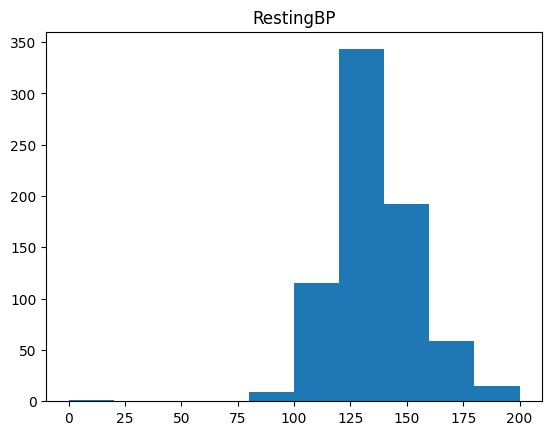

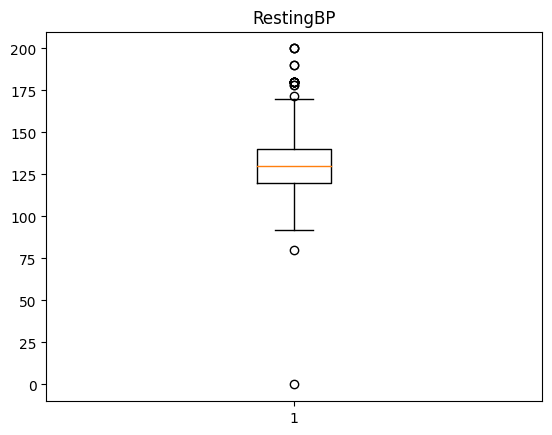

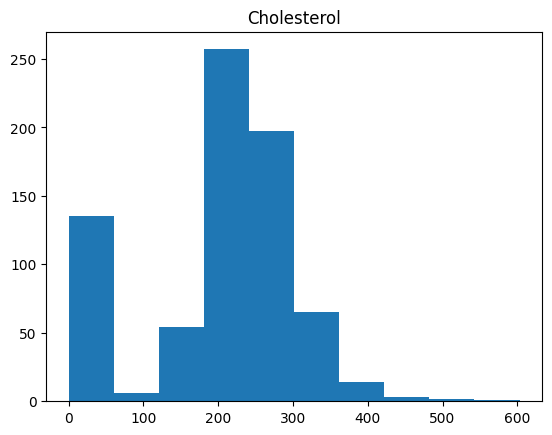

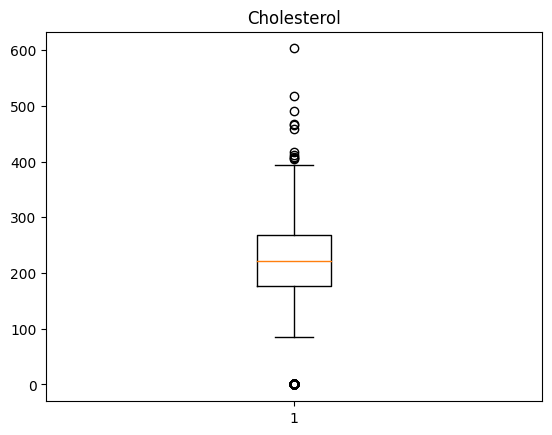

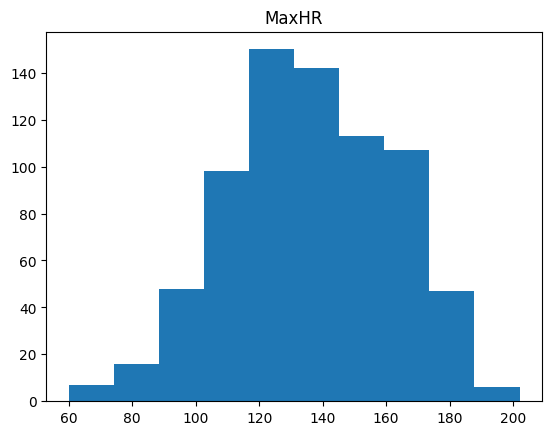

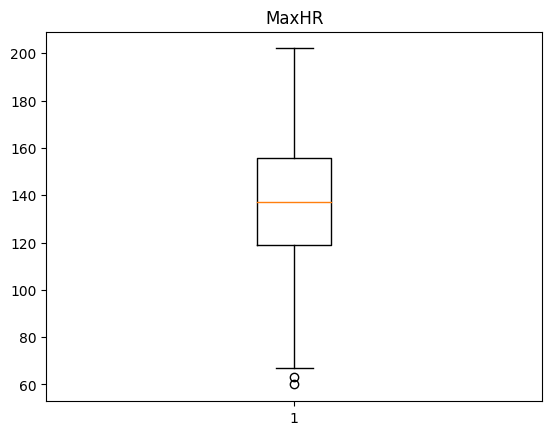

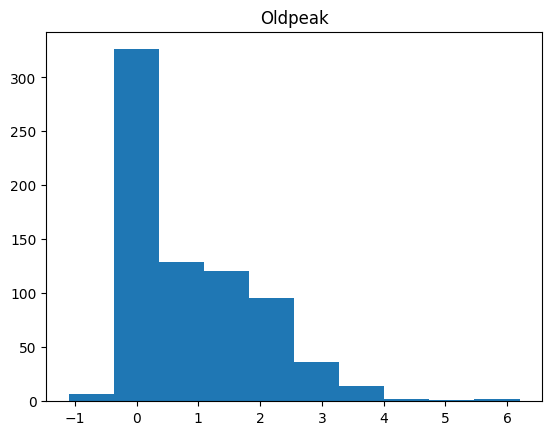

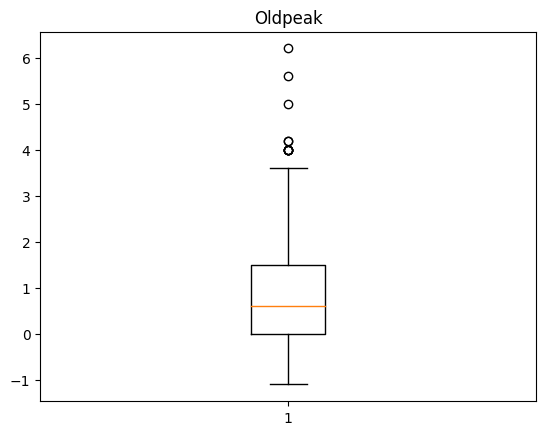

In [39]:
train_data_num = train[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]]
for i in train_data_num.columns:    
    plt.hist(train_data_num[i])
    plt.title(i)
    plt.show()
    plt.boxplot(train_data_num[i])
    plt.title(i)
    plt.show()




**Regardons les corrélations entre les différentes variables numériques**

<Axes: >

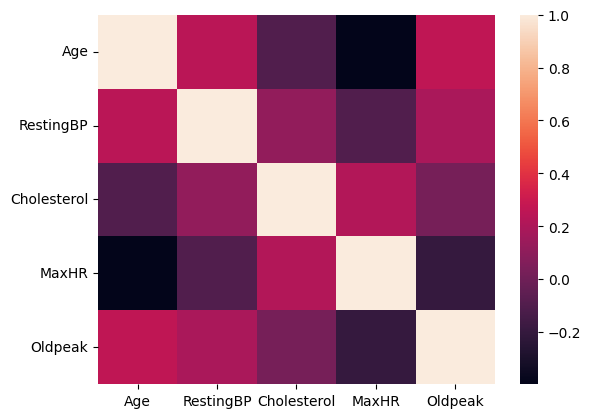

In [40]:
sns.heatmap(train_data_num.corr())

On n'a pas vraiment de corrélation positive mais il  y a quelques légères corrélations négatives comme l'âge et la fréqueence cardiaque et la glycémie et le cholesterol

In [41]:
pd.pivot_table(train, index="HeartDisease", values=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingBP
HeartDisease,,,,,,
0,50.667702,227.801242,0.10559,147.468944,0.420497,130.23913
1,56.089806,178.000000,0.32767,127.526699,1.294903,134.31068


On peut commencer à tracer le profil d'une personne ayant eu un arrêt cardiaque (ce n'est pas définitif et pas forcément vrai. C'est une première esquisse): il est généralement plus vieux, a un cholesterol plus faible, il a 3 fois plus de chance d'avoir un taux de glycémie à jeun de 120mg/dl ou plus. Il a une fréquance cardiaque maximale faible etc...

Regardons maintenant les données qualitatives

In [42]:
train_data_quali = train[['Sex', 'ChestPainType', "FastingBS",
       'RestingECG', 'ExerciseAngina', 'ST_Slope']]

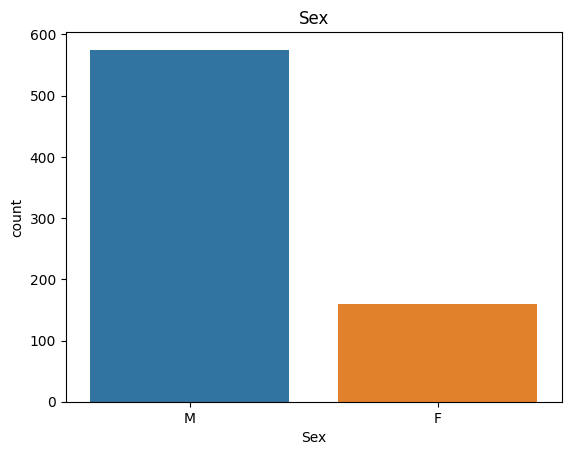

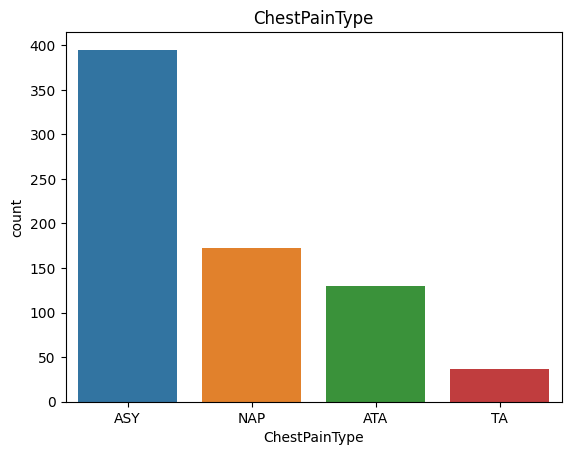

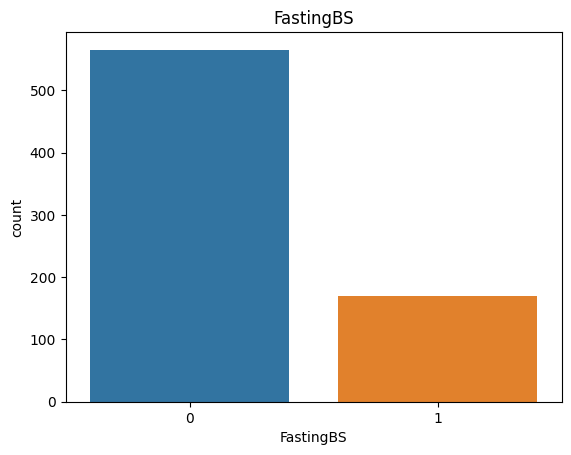

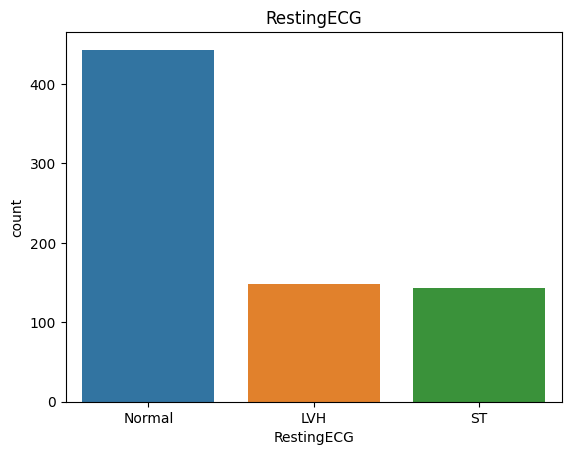

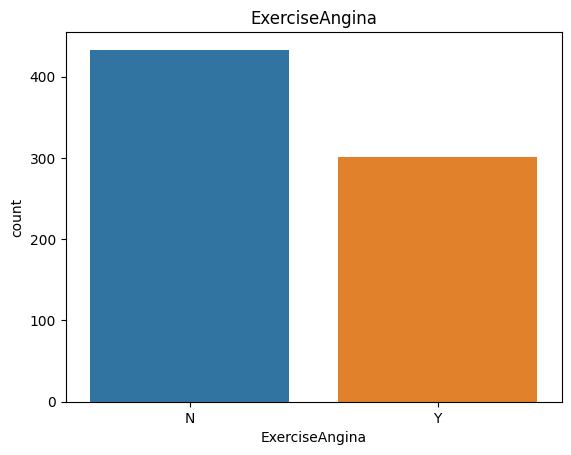

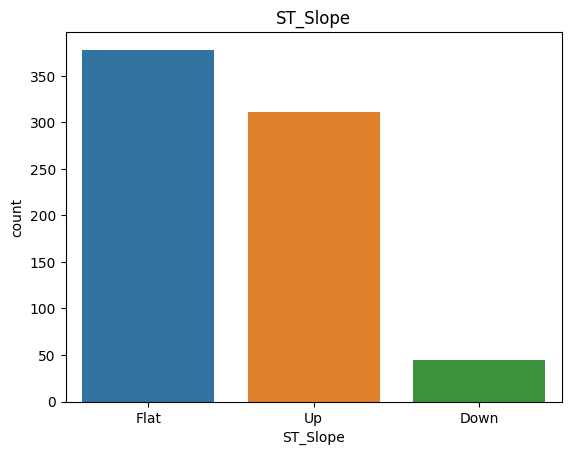

In [43]:
for info in train_data_quali.columns:
    sns.barplot(x=train_data_quali[info].value_counts().index, y=train_data_quali[info].value_counts()).set_title(info)
    plt.show()

In [44]:
# Pour entrainer nos modèles, il va falloir convertir nos données qualitatives en données numériques en utilisant get_dummies

train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [45]:
#Vérifions que les données ont bien été remplacées
train.head(50)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
425,60,160,267,1,157,0.5,1,False,True,False,...,False,False,False,False,True,True,False,False,True,False
89,55,140,229,0,110,0.5,0,False,True,True,...,False,False,False,True,False,False,True,False,True,False
777,55,130,262,0,155,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
239,48,160,193,0,102,3.0,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
889,59,134,204,0,162,0.8,1,False,True,False,...,False,True,False,True,False,True,False,False,False,True
894,58,130,197,0,131,0.6,0,True,False,True,...,False,False,False,True,False,True,False,False,True,False
504,62,158,210,1,112,3.0,1,False,True,True,...,False,False,False,True,False,False,True,True,False,False
424,60,120,0,1,141,2.0,1,False,True,False,...,True,False,False,True,False,False,True,False,False,True
224,55,120,256,1,137,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
890,64,170,227,0,155,0.6,0,False,True,False,...,False,True,True,False,False,True,False,False,True,False


Nous allons enlever la colonne HeartDisease de test afin que nous puissons faire nos prédictoins avant de comparer nos résultats à ceux de cette colonne

In [46]:
# C'est le moment
x_train = train.drop(columns = ["HeartDisease"])
y_train = train["HeartDisease"]

x_test = test.drop(columns = ["HeartDisease"])
y_test = test["HeartDisease"]



J'ai fait des recherches sur le type de régression à utiliser parce qu'il y en a beaucoup et je ne les connais pas toutes. Je suis tombé sur une vidéo qui explique brièvement quelle régression utiliser selon le scénario et dans mon cas, la "Binary Logistic Regression" serait la régression à effectuer dans mon cas (on cherche une réponse tranchée avec seulement deux options: oui on non (https://youtu.be/i8tjLQUPc8Y). Cela s'est confirmé quand j'ai trouvé un pdf de Claremont Graduate University dans lequel il est écrit que la "Binary Logistic Regression" est utilse lorsqu'on a affaire à un choix entre deux possibiéités. http://wise.cgu.edu/wp-content/uploads/2016/07/Introduction-to-Logistic-Regression.pdf

In [47]:
from sklearn.linear_model import LogisticRegression
import sklearn
# En faisant mes recherches, j'ai remarqué que beaucoup de gens utilisaient le paramètre max_iter 
# de LogisticRegression alors j'ai décidé d'en tester quelques uns afin de trouver le nombre qui va 
# maximiser mon résultat (je pense que le plus sera le mieux)

# j'essayais max_iter avec 500 et il y avait des erreurs. Fonctionne avec 1000 et plus. Fonctionne à partir de 639. 
# On peut voir que pour ce scénario, max_iter n'a pas d'importance
for i in range(1000,20000,2500):
    Log_Reg = LogisticRegression(max_iter=i)
    modele=Log_Reg.fit(x_train, y_train)
    print("Précision train:",modele.score(x_train, y_train),"\n","Précision test:",modele.score(x_test,y_test))

Précision train: 0.8678474114441417 
 Précision test: 0.8804347826086957
Précision train: 0.8678474114441417 
 Précision test: 0.8804347826086957
Précision train: 0.8678474114441417 
 Précision test: 0.8804347826086957
Précision train: 0.8678474114441417 
 Précision test: 0.8804347826086957
Précision train: 0.8678474114441417 
 Précision test: 0.8804347826086957
Précision train: 0.8678474114441417 
 Précision test: 0.8804347826086957
Précision train: 0.8678474114441417 
 Précision test: 0.8804347826086957
Précision train: 0.8678474114441417 
 Précision test: 0.8804347826086957


Voici la fin de mon premier projet Kaggle. J'ai fait un modèle basique qui me permet de prédire

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x_train,y_train,cv=10)
score.mean()

0.850129581636431